In [1]:
import pandas as pd
import numpy as np


In [2]:
data1 = pd.read_csv('E:\data mining\dataset_csv\dataset_imp_date_time.csv')


In [3]:
data1=data1.iloc[:,2:]

In [4]:
data1.head()

,Vehicle_ID,Sample_ID,State_Of_Health_Battery,Battery_Generation,Fleet_ID,Country,Vehicle_MRK_TYPE,CURRENT_YEARLY_MILEAGE,Mounted_Battery_Generation,Measure_R_D,Engine_Type,Geo_Area,City,Cluster,IS_PATTERN_AVAILABLE,IS_FLEET_TOF_MONITORED,IS_CHECKED_IN_VDA,Battery_Supplier,Battery_Replacement_date1,send_time1
0,1.0,262526303.0,67.50,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2015-08-01 00:00:00,2019-03-11 17:35:14
1,1.0,115517796.0,72.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2015-08-01 00:00:00,2017-11-10 18:09:35
2,1.0,251857645.0,54.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2015-08-01 00:00:00,2019-02-21 07:24:22
3,1.0,47893312.0,95.50,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2015-08-01 00:00:00,2015-12-20 16:26:27
4,1.0,96601019.0,76.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2015-08-01 00:00:00,2017-06-12 13:01:16


In [5]:
data2=pd.read_csv('E:\data mining\dataset_csv\op_t.csv')

In [6]:
data2=data2.iloc[:,1:]

In [7]:
data2=data2.drop(['CURRENT_YEARLY_MILEAGE','Vehicle_ID'],axis=1)

In [7]:
data2.head()

KeyboardInterrupt: 

In [ ]:
data4=pd.concat([data1,data2],axis=1)

In [ ]:
data4

In [ ]:
data4['Battery_Replacement_date1']=pd.to_datetime(data4['Battery_Replacement_date1'])
data4['send_time1']=pd.to_datetime(data4['send_time1'])

In [ ]:
data4=data4.iloc[:,2:]

In [ ]:
data4=data4.drop(['Battery_Replacement_date1','send_time1'],axis=1)

In [ ]:
data4

In [ ]:
data4=data4.dropna()

In [ ]:
data5=data4[['Operation_DISTANCE','Operation_TIME','Cluster','State_Of_Health_Battery']]

In [ ]:
data5['speed']=data5['Operation_DISTANCE']/data5['Operation_TIME']

In [ ]:
data5

In [ ]:
data5.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
data41=std.fit_transform(data4)

In [ ]:
data41

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=4)
data42=pca.fit_transform(data41)

In [ ]:
data42

In [ ]:
from sklearn.cluster import DBSCAN

In [26]:
clu=DBSCAN(eps=0.3,min_samples=20,metric='euclidean')

In [ ]:
clu.fit(data42)

In [ ]:
v=clu.labels_

In [ ]:
v1=pd.DataFrame(v)

In [ ]:
v1.iloc[:,0].value_counts()

<ipython-input-26-49e02db67eea>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


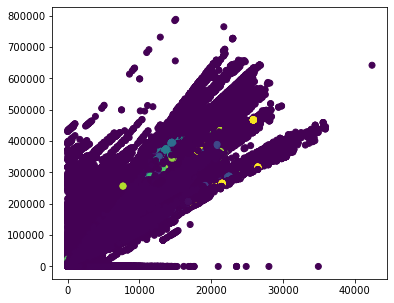

In [26]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(6,5))
ax.scatter(data4.iloc[:,-1],data4.iloc[:,-2],c=v)
fig.show()

In [27]:
outliers=data4[clu.labels_==-1]
clusters=data4[clu.labels_!=-1]
colors=clu.labels_
color_cus=colors[colors!=-1]
colour_ot='black'


In [28]:
print(outliers.shape,clusters.shape)

(37727, 19) (756699, 19)


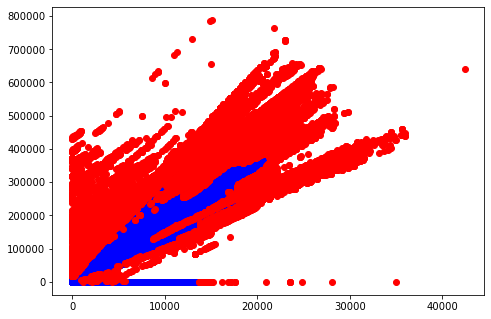

In [29]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
ax.scatter(clusters.iloc[:,-1],clusters.iloc[:,-2],color='b')
ax.scatter(outliers.iloc[:,-1],outliers.iloc[:,-2],c='r')

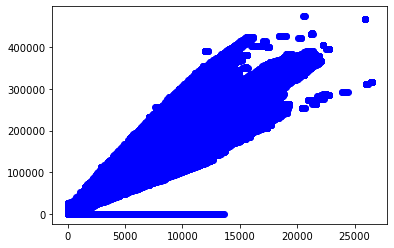

In [30]:
plt.scatter(clusters.iloc[:,-1],clusters.iloc[:,-2],color='b')


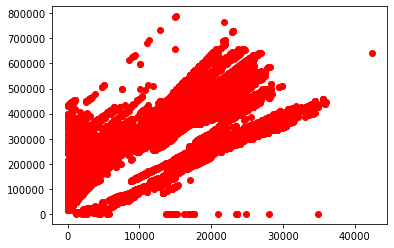

In [31]:
plt.scatter(outliers.iloc[:,-1],outliers.iloc[:,-2],c='r')

In [32]:
data4.head()

,State_Of_Health_Battery,Battery_Generation,Fleet_ID,Country,Vehicle_MRK_TYPE,CURRENT_YEARLY_MILEAGE,Mounted_Battery_Generation,Measure_R_D,Engine_Type,Geo_Area,City,Cluster,IS_PATTERN_AVAILABLE,IS_FLEET_TOF_MONITORED,IS_CHECKED_IN_VDA,Battery_Supplier,Battery_Supplier,Operation_DISTANCE,Operation_TIME
0,67.50,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,247897.59,9157.192
1,72.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,161516.35,3146.041
2,54.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,134506.02,8900.673
3,95.50,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,27599.18,1386.207
4,76.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,129568.38,1146.683


Text(0.5, 0, 'Operation_TIME')

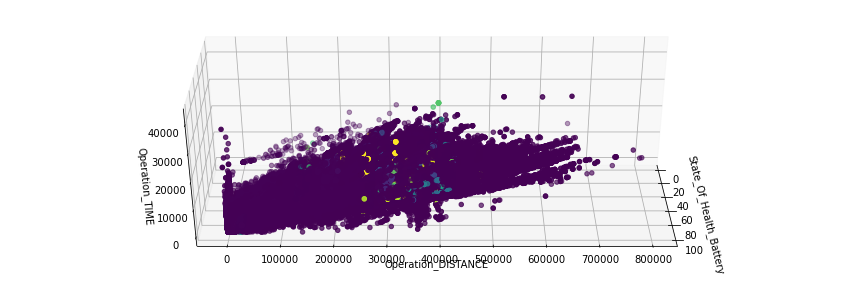

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data4['State_Of_Health_Battery'],data4['Operation_DISTANCE'],data4['Operation_TIME'],c=v)
ax.view_init(30,0)
ax.set_xlabel('State_Of_Health_Battery')
ax.set_ylabel('Operation_DISTANCE')
ax.set_zlabel('Operation_TIME')

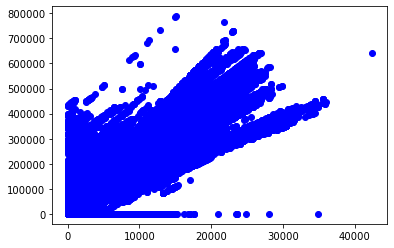

In [34]:
plt.scatter(data4.iloc[:,-1],data4.iloc[:,-2],color='b')


In [35]:
from sklearn import metrics

In [37]:
metrics.silhouette_score(data4,clu.labels_)

KeyboardInterrupt: 